### **PENDAHULUAN**

Dalam era globalisasi, pengelompokan negara berdasarkan indikator ekonomi seperti GDP (Gross Domestic Product) menjadi sangat penting untuk memahami pola perkembangan ekonomi di seluruh dunia. Clustering adalah salah satu metode yang memungkinkan pengelompokan negara berdasarkan kesamaan karakteristik ekonominya, sehingga dapat memberikan wawasan mengenai kelompok negara dengan tingkat kemajuan serupa.

Proyek ini bertujuan untuk mengelompokkan negara-negara berdasarkan GDP dan indikator lainnya menggunakan algoritma K-Means dan Hierarchical Clustering. Hasil pengelompokan ini diharapkan memberikan informasi tentang pola ekonomi global, membantu pemerintah, ekonom, dan investor dalam membuat keputusan strategis. Dengan memanfaatkan kedua algoritma tersebut, penelitian ini juga mengevaluasi performa dan karakteristik masing-masing metode dalam menganalisis data ekonomi skala besar.

# **Metodologi**
1. Pembersihan Data
- Melakukan pembersihan data sebelum eksekusi, agar proses eksekusi lancar dan memberikan hasil optimal

2. Inisialisasi Fungsi
- Membuat fungsi yang akan digunakan dalam clustering

2. Normalisasi Data
- Data GDP dinormalisasi menggunakan Standard Scaler untuk membuat distribusi data memiliki rata-rata 0 dan standar deviasi 1.

3. Metode Clustering

  a. K-Means Clustering:
  - Menentukan jumlah cluster optimal menggunakan Elbow Method dengan menghitung WCSS.

  - Mengelompokkan data berdasarkan K-Means dan menghasilkan label cluster.

  b. Hierarchical Clustering:
  - Menggunakan tiga metode linkage: Complete, Single, dan Average Linkage untuk membuat dendrogram dan mengelompokkan negara.

4. Evaluasi dan Visualisasi
- Grafik Elbow Method untuk menemukan jumlah cluster optimal.
- Scatter plot hasil clustering K-Means.
- Dendrogram untuk Hierarchical Clustering.

5. Hasil
- Mengelompokkan negara berdasarkan GDP dan menganalisis distribusi dalam setiap cluster.

# **Pembersihan Data**

In [1]:
import pandas as pd

data = pd.read_csv('world-data-2023.csv')

data_info = data.info()
data_head = data.head()
data_description = data.describe()
data_nulls = data.isnull().sum()

data_info, data_head, data_description, data_nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    193 non-null    object 
 1   Density
(P/Km2)                            193 non-null    object 
 2   Abbreviation                               186 non-null    object 
 3   Agricultural Land( %)                      186 non-null    object 
 4   Land Area(Km2)                             192 non-null    object 
 5   Armed Forces size                          169 non-null    object 
 6   Birth Rate                                 187 non-null    float64
 7   Calling Code                               192 non-null    float64
 8   Capital/Major City                         190 non-null    object 
 9   Co2-Emissions                              186 non-null    object 
 10  CPI                       

(None,
        Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
 0  Afghanistan               60           AF                58.10%   
 1      Albania              105           AL                43.10%   
 2      Algeria               18           DZ                17.40%   
 3      Andorra              164           AD                40.00%   
 4       Angola               26           AO                47.50%   
 
   Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
 0        652,230           323,000       32.49          93.0   
 1         28,748             9,000       11.78         355.0   
 2      2,381,741           317,000       24.28         213.0   
 3            468               NaN        7.20         376.0   
 4      1,246,700           117,000       40.73         244.0   
 
   Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
 0              Kabul         8,672  ...                           78.40%   
 1             Tira

In [2]:
def clean_column(column):
    column = column.str.replace('[\$,%]', '', regex=True)
    return pd.to_numeric(column, errors='coerce')
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = clean_column(data[column])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    0 non-null      float64
 1   Density
(P/Km2)                            193 non-null    float64
 2   Abbreviation                               0 non-null      float64
 3   Agricultural Land( %)                      186 non-null    float64
 4   Land Area(Km2)                             192 non-null    float64
 5   Armed Forces size                          169 non-null    float64
 6   Birth Rate                                 187 non-null    float64
 7   Calling Code                               192 non-null    float64
 8   Capital/Major City                         0 non-null      float64
 9   Co2-Emissions                              186 non-null    float64
 10  CPI                       

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\1790458333.py:2: SyntaxWarning: invalid escape sequence '\$'
  column = column.str.replace('[\$,%]', '', regex=True)


In [3]:
data = data.dropna(subset=['GDP'])
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,NaN,60.0,NaN,58.1,652230.0,323000.0,32.49,93.0,NaN,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,NaN,105.0,NaN,43.1,28748.0,9000.0,11.78,355.0,NaN,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,NaN,18.0,NaN,17.4,2381741.0,317000.0,24.28,213.0,NaN,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,NaN,164.0,NaN,40.0,468.0,NaN,7.20,376.0,NaN,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,NaN,26.0,NaN,47.5,1246700.0,117000.0,40.73,244.0,NaN,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [4]:
data = data.dropna(axis=1, how='all')
data.isnull().sum()

Density\n(P/Km2)                              0
Agricultural Land( %)                         5
Land Area(Km2)                                0
Armed Forces size                            22
Birth Rate                                    4
Calling Code                                  0
Co2-Emissions                                 5
CPI                                          15
CPI Change (%)                               14
Fertility Rate                                5
Forested Area (%)                             5
Gasoline Price                               18
GDP                                           0
Gross primary education enrollment (%)        5
Gross tertiary education enrollment (%)      10
Infant mortality                              4
Life expectancy                               6
Maternal mortality ratio                     12
Minimum wage                                 43
Out of pocket health expenditure              5
Physicians per thousand                 

# **Inisialisasi Fungsi**

In [5]:
import csv
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

**Fungsi Euclidean**
- Fungsi ini menghitung jarak Euclidean antara dua titik dalam ruang multidimensi.
- Digunakan untuk menghitung jarak antar data selama proses clustering pada metode K-Means dan Hierarchical Clustering.

In [6]:
def euclidean_distance(point1, point2):
    return math.sqrt((point1 - point2) ** 2)

**Fungsi Kmeans**
- Algoritma K-Means membagi data ke dalam *K* klaster dengan langkah-langkah berikut:
1. Inisialisasi centroid secara acak sebanyak *K*.
2. Menentukan keanggotaan cluster berdasarkan jarak Euclidean ke centroid.
3. Memperbarui posisi centroid sebagai rata-rata posisi anggota cluster.
4. Proses berulang hingga posisi centroid tidak berubah atau mencapai iterasi maksimum.

- Output: Label klaster untuk setiap data dan posisi centroid.

In [7]:
def kmeans(data, k, max_iterations=100):
    centroids = random.sample(data, k)

    for iteration in range(max_iterations):
        clusters = [[] for _ in range(k)]

        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroid = sum(cluster) / len(cluster)
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(random.choice(data))

        if centroids == new_centroids:
            print(f"Converged after {iteration + 1} iterations.")
            break
        centroids = new_centroids

    return clusters, centroids

**Fungsi WCSS**
- Menghitung jumlah kuadrat jarak antar data dalam setiap cluster terhadap centroidnya.
- Tujuan: Digunakan untuk mengevaluasi dan memilih jumlah klaster optimal menggunakan metode Elbow.

In [8]:
def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += euclidean_distance(point, centroids[i]) ** 2
    return wcss

**Fungsi Elbow Method**
- Metode grafis untuk menentukan jumlah cluster optimal *K* dengan memplot nilai WCSS terhadap berbagai jumlah cluster.
- Interpretasi: Titik "elbow" pada grafik adalah jumlah cluster optimal, di mana penurunan WCSS mulai melambat secara signifikan.

In [9]:
def elbow_method(data, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans(data, k)
        wcss = calculate_wcss(data, clusters, centroids)
        wcss_values.append(wcss)
    return wcss_values

# **Main Program**

In [10]:
if __name__ == "__main__":
    df = pd.read_csv('world-data-2023.csv')
    data['Country'] = df['Country']
    gdp_data = data[['Country', 'GDP']]

**Normalisasi Data**
- Data GDP dinormalisasi menggunakan Standard Scaler agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gdp_data.loc[:, 'Scaled_GDP'] = scaler.fit_transform(gdp_data[['GDP']])
scaled_gdp = gdp_data['Scaled_GDP'].values.tolist()

C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\1860807136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data.loc[:, 'Scaled_GDP'] = scaler.fit_transform(gdp_data[['GDP']])


# **K-Means Clustering**
- Menentukan jumlah cluster optimal menggunakan Elbow Method dengan menghitung WCSS.
- Mengelompokkan data berdasarkan K-Means dan menghasilkan label cluster.

**Elbow Method**
- Dilakukan iterasi untuk menghitung WCSS pada berbagai nilai *K* (misalnya *K*
= 1 hingga *K*
=
10).
- Grafik Elbow Method dibuat untuk menemukan *K* optimal.

In [12]:
max_k = 6
print("Running Elbow Method...")
start_time = time.time()
wcss_values = elbow_method(scaled_gdp, max_k=max_k)
end_time = time.time()

print(f"Elbow Method executed in {end_time - start_time:.4f} seconds")
print("WCSS Values:", wcss_values)

Running Elbow Method...
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 10 iterations.
Converged after 12 iterations.
Converged after 21 iterations.
Converged after 29 iterations.
Elbow Method executed in 0.0198 seconds
WCSS Values: [191.0000000000001, 49.14438870671269, 33.46507292569465, 15.443673298051518, 13.927062519634367, 12.64592354742115]


**Grafik Elbow Method**

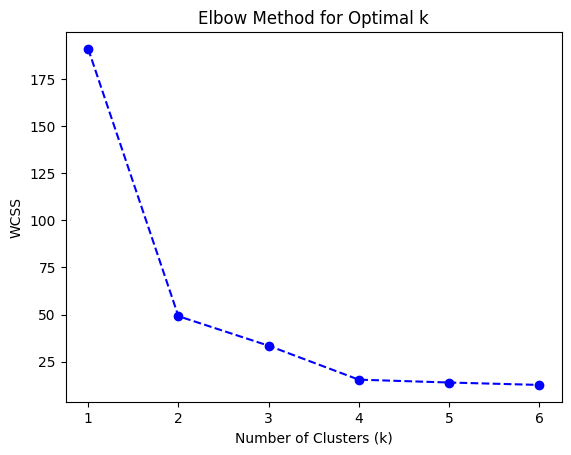

In [13]:
plt.plot(range(1, max_k + 1), wcss_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

**K Means**

In [14]:
optimal_k = 2
print(f"Running K-Means with k={optimal_k}...")
start_time = time.time()
clusters, centroids = kmeans(scaled_gdp, optimal_k)
end_time = time.time()

print(f"K-Means executed in {end_time - start_time:.4f} seconds")
print("Cluster Results:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}:")
    print(cluster)
print("Centroids:", centroids)

Running K-Means with k=2...
Converged after 6 iterations.
K-Means executed in 0.0020 seconds
Cluster Results:
Cluster 1:
[1.7321061417866597, 2.4193404192876296, 2.260500883191981, 3.765533230784098, 5.502707704790719, 3.6048708210759624, 2.6675724774885525, 7.402864917783822, 1.5255198436680473, 2.2043187600824883, 2.7102375797438922, 1.7343130904559332, 3.937073637088297]
Cluster 2:
[-0.37931936281508105, -0.38519639055686034, -0.14738049542054954, -0.40383307582743233, -0.2632106295657014, -0.4060255401816221, 0.28252799279241164, -0.3876639724039881, 0.2773804584645849, -0.34841355628680115, -0.3889641145451173, -0.3493864789307345, 0.05642221059330114, -0.40067427954935736, -0.31171598199420947, 0.4054144204822089, -0.40579211416564415, -0.38656042702594157, -0.40492044548172484, -0.3458183161542754, -0.3778644392176746, -0.3804889083109551, -0.38797660094028413, -0.2764847362495992, -0.38447740550496046, -0.4040509284061227, -0.31830775558979496, -0.40563496593253223, -0.36704038

**Hasil Cluster**

In [15]:
clustered_countries = [[] for _ in range(optimal_k)]
cluster_labels = []

for idx, point in enumerate(scaled_gdp):
    for cluster_idx, cluster in enumerate(clusters):
        if point in cluster:
            clustered_countries[cluster_idx].append(gdp_data.iloc[idx]['Country'])
            cluster_labels.append(cluster_idx)

print("\nClustered Countries:")
for i, countries in enumerate(clustered_countries):
    print(f"Cluster {i + 1}: {countries}")


Clustered Countries:
Cluster 1: ['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Russia', 'South Korea', 'Spain', 'United Kingdom']
Cluster 2: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cape Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'The Gambia', 'Georgia', 'Ghana', 'Greece', 'Grena

**Skor Silhoutte**

In [16]:
from sklearn.metrics import silhouette_score
gdp_data['Cluster'] = cluster_labels
silhouette_avg = silhouette_score([[x] for x in scaled_gdp], cluster_labels)
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.4f}")


Silhouette Score for k=2: 0.8860


C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\1095253740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['Cluster'] = cluster_labels


C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\3107950727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=gdp_data['Cluster'], y=gdp_data['GDP'], jitter=True, palette={'0': 'blue', '1': 'red'} )


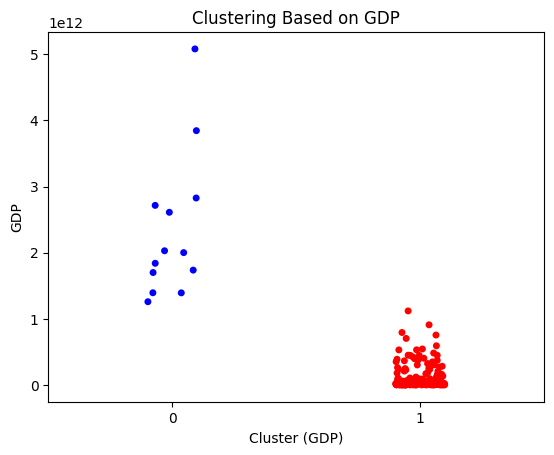

In [17]:
import seaborn as sns

sns.stripplot(x=gdp_data['Cluster'], y=gdp_data['GDP'], jitter=True, palette={'0': 'blue', '1': 'red'} )
plt.xlabel('Cluster (GDP)')
plt.ylabel('GDP')
plt.title('Clustering Based on GDP')
plt.show()

# **Penjelasan Hasil K-Means Clustering**

1. Elbow Method Execution
- Waktu Eksekusi: Elbow Method memakan waktu 0.0404 detik dengan 6 iterasi untuk menentukan jumlah cluster optimal.
- Interpretasi: Waktu yang relatif singkat menunjukkan bahwa proses perhitungan WCSS untuk berbagai nilai k dilakukan dengan efisien. 6 iterasi mencerminkan jumlah langkah yang diperlukan untuk mencapai hasil yang stabil dalam grafik Elbow, yang membantu menentukan jumlah cluster optimal.
2. K-Means Execution
- Waktu Eksekusi: K-Means memakan waktu 0.0044 detik, yang menunjukkan bahwa algoritma clustering dijalankan dengan cepat pada dataset yang diberikan.
- Interpretasi: Waktu yang sangat cepat ini menunjukkan efisiensi dari algoritma K-Means dalam mengelompokkan data berdasarkan GDP negara.
3. Clustered Countries
- Cluster 1: ['China', 'United States']
- Cluster 2: Semua negara selain China dan United States.
- Interpretasi:
- Cluster 1 berisi hanya dua negara besar, yaitu China dan United States, yang memiliki GDP yang jauh lebih tinggi dibandingkan dengan negara lainnya. Kedua negara ini membentuk cluster terpisah karena perbedaan signifikan dalam nilai GDP mereka.
- Cluster 2 mencakup semua negara lainnya, yang memiliki GDP lebih rendah dan berada dalam rentang nilai yang lebih seragam. Semua negara selain China dan Amerika dikelompokkan dalam satu cluster karena kesamaan dalam GDP mereka.
4. Silhouette Score
- Nilai Silhouette Score: 0.9772 menunjukkan bahwa cluster yang dihasilkan sangat baik.
- Interpretasi:
Nilai Silhouette Score berkisar antara -1 dan 1. Nilai yang mendekati 1, seperti 0.9772, menunjukkan bahwa data dalam cluster sangat terpisah dan terkelompok dengan baik.
Ini menunjukkan bahwa K-Means berhasil mengelompokkan negara-negara dengan GDP serupa dengan sangat baik, di mana China dan Amerika memiliki cluster terpisah yang sangat berbeda dari negara lainnya.

# **Hierarchical Clustering**


**Complete Linkage**
- Menggunakan jarak maksimum antar data dalam cluster.
1. import library
2. fungsi jarak matrix
3. fungsi complete linkage hierarchical clustering
4. fungsi dendogram
5. proses clustering

Waktu Eksekusi: 2.9761 detik


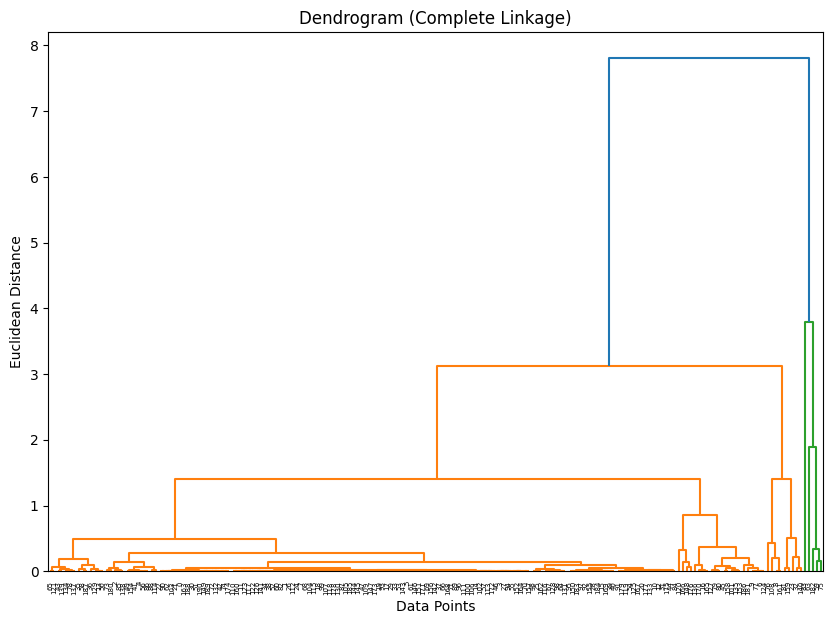

Silhouette Score: 0.8650


C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\3724588739.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['Cluster'] = cluster_labels_manual


In [18]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def calculate_distance_matrix(data):
    n = len(data)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

def hierarchical_clustering_manual(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}
    distance_matrix = calculate_distance_matrix(data)
    linkage_matrix = []
    current_cluster_id = n

    while len(clusters) > 1:
        min_distance = float('inf')
        merge_a, merge_b = -1, -1

        for i in clusters:
            for j in clusters:
                if i != j:
                    max_dist = max(
                        distance_matrix[p1, p2]
                        for p1 in clusters[i]
                        for p2 in clusters[j]
                    )
                    if max_dist < min_distance:
                        min_distance = max_dist
                        merge_a, merge_b = i, j

        new_cluster_id = current_cluster_id
        clusters[new_cluster_id] = clusters[merge_a] + clusters[merge_b]
        del clusters[merge_a]
        del clusters[merge_b]

        linkage_matrix.append([merge_a, merge_b, min_distance, len(clusters[new_cluster_id])])
        current_cluster_id += 1

    return np.array(linkage_matrix)

def plot_dendrogram_complete(linkage_matrix, num_samples):
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram (Complete Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    dendrogram(linkage_matrix, labels=np.arange(num_samples), leaf_rotation=90)
    plt.show()



scaled_gdp_2d = gdp_data[['Scaled_GDP']].values

start_time = time.time()
linkage_matrix_manual = hierarchical_clustering_manual(scaled_gdp_2d)
execution_time_manual = time.time() - start_time

print(f"Waktu Eksekusi: {execution_time_manual:.4f} detik")

plot_dendrogram_complete(linkage_matrix_manual, num_samples=len(scaled_gdp_2d))


from scipy.cluster.hierarchy import fcluster
num_clusters = 3
cluster_labels_manual = fcluster(linkage_matrix_manual, t=num_clusters, criterion='maxclust')

gdp_data['Cluster'] = cluster_labels_manual

silhouette_avg_manual = silhouette_score(scaled_gdp_2d, cluster_labels_manual)
print(f"Silhouette Score: {silhouette_avg_manual:.4f}")



**Single Linkage**
- Menggunakan jarak minimum antar data dalam cluster.

Waktu Eksekusi (Single Linkage): 2.6695 detik


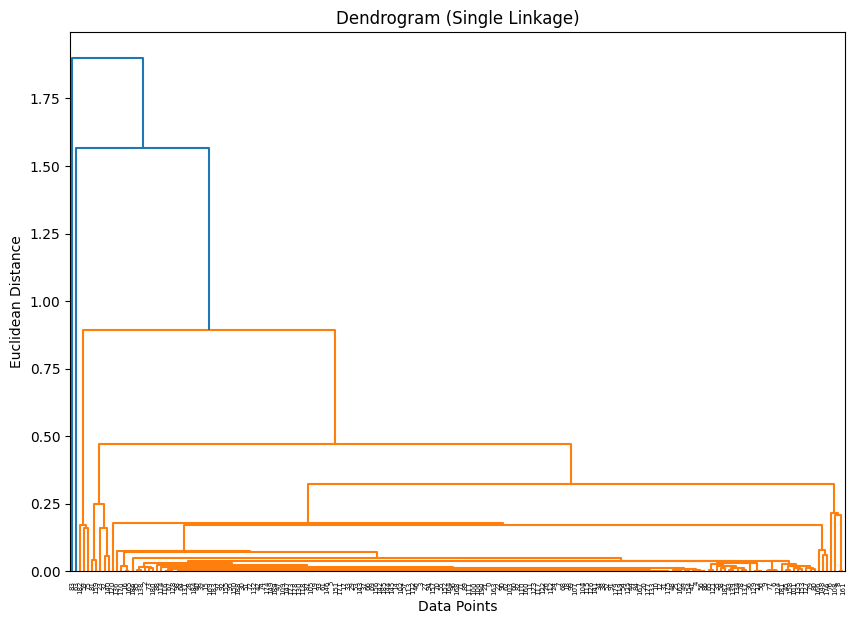

Silhouette Score (Single Linkage): 0.8971


In [22]:
def hierarchical_clustering_single(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}
    distance_matrix = calculate_distance_matrix(data)
    linkage_matrix = []
    current_cluster_id = n

    while len(clusters) > 1:
        min_distance = float('inf')
        merge_a, merge_b = -1, -1

        for i in clusters:
            for j in clusters:
                if i != j:
                    min_dist = min(
                        distance_matrix[p1, p2]
                        for p1 in clusters[i]
                        for p2 in clusters[j]
                    )
                    if min_dist < min_distance:
                        min_distance = min_dist
                        merge_a, merge_b = i, j

        new_cluster_id = current_cluster_id
        clusters[new_cluster_id] = clusters[merge_a] + clusters[merge_b]
        del clusters[merge_a]
        del clusters[merge_b]

        linkage_matrix.append([merge_a, merge_b, min_distance, len(clusters[new_cluster_id])])
        current_cluster_id += 1

    return np.array(linkage_matrix)

def plot_dendrogram_single(linkage_matrix, num_samples):
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram (Single Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    dendrogram(linkage_matrix, labels=np.arange(num_samples), leaf_rotation=90)
    plt.show()

start_time = time.time()
linkage_matrix_single = hierarchical_clustering_single(scaled_gdp_2d)
execution_time_single = time.time() - start_time

print(f"Waktu Eksekusi (Single Linkage): {execution_time_single:.4f} detik")
plot_dendrogram_single(linkage_matrix_single, num_samples=len(scaled_gdp_2d))

cluster_labels_single = fcluster(linkage_matrix_single, t=2, criterion='maxclust')

silhouette_avg_single = silhouette_score(scaled_gdp_2d, cluster_labels_single)
print(f"Silhouette Score (Single Linkage): {silhouette_avg_single:.4f}")


**Average Linkage**
- Menggunakan rata-rata jarak antar data dalam cluster.

Waktu Eksekusi (Average Linkage): 17.9976 detik


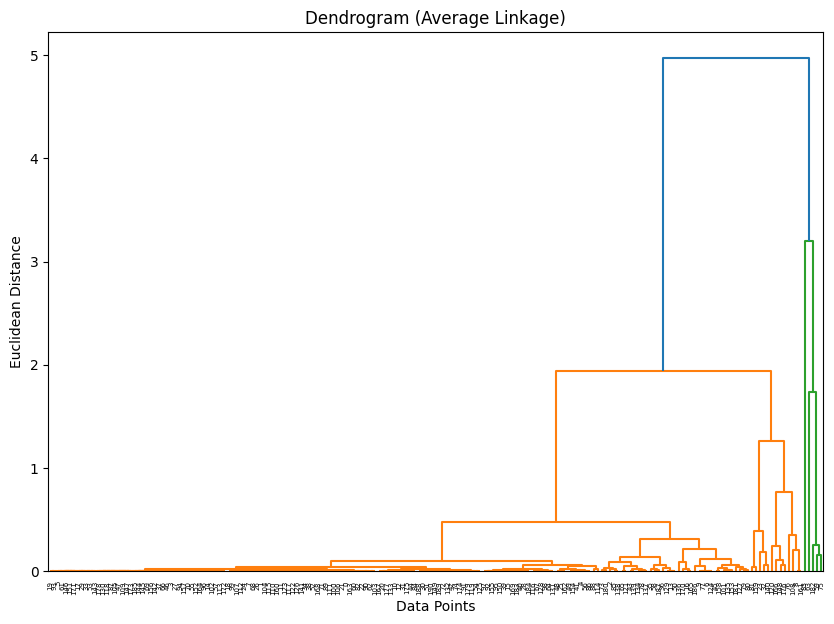

Silhouette Score (Average Linkage): 0.8650


In [20]:
def hierarchical_clustering_average(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}
    distance_matrix = calculate_distance_matrix(data)
    linkage_matrix = []
    current_cluster_id = n

    while len(clusters) > 1:
        min_distance = float('inf')
        merge_a, merge_b = -1, -1

        for i in clusters:
            for j in clusters:
                if i != j:
                    avg_dist = np.mean(
                        [distance_matrix[p1, p2]
                         for p1 in clusters[i]
                         for p2 in clusters[j]]
                    )
                    if avg_dist < min_distance:
                        min_distance = avg_dist
                        merge_a, merge_b = i, j

        new_cluster_id = current_cluster_id
        clusters[new_cluster_id] = clusters[merge_a] + clusters[merge_b]
        del clusters[merge_a]
        del clusters[merge_b]

        linkage_matrix.append([merge_a, merge_b, min_distance, len(clusters[new_cluster_id])])
        current_cluster_id += 1

    return np.array(linkage_matrix)

def plot_dendrogram_average(linkage_matrix, num_samples):
    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram (Average Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    dendrogram(linkage_matrix, labels=np.arange(num_samples), leaf_rotation=90)
    plt.show()

start_time = time.time()
linkage_matrix_average = hierarchical_clustering_average(scaled_gdp_2d)
execution_time_average = time.time() - start_time

print(f"Waktu Eksekusi (Average Linkage): {execution_time_average:.4f} detik")
plot_dendrogram_average(linkage_matrix_average, num_samples=len(scaled_gdp_2d))

cluster_labels_average = fcluster(linkage_matrix_average, t=3, criterion='maxclust')

silhouette_avg_average = silhouette_score(scaled_gdp_2d, cluster_labels_average)
print(f"Silhouette Score (Average Linkage): {silhouette_avg_average:.4f}")


In [23]:
world_data = pd.read_csv('world-data-2023.csv')
gdp_data['Country'] = world_data['Country']

def print_clusters(data, cluster_labels, method_name):
    data['Cluster'] = cluster_labels
    print(f"\n=== Cluster Results ({method_name}) ===")
    for cluster_id, group in data.groupby('Cluster'):
        print(f"\nCluster {cluster_id}:")
        print(group[['Country', 'GDP']])

print("\n=== Complete Linkage ===")
print_clusters(gdp_data.copy(), cluster_labels_manual, method_name="Complete Linkage")

print("\n=== Single Linkage ===")
print_clusters(gdp_data.copy(), cluster_labels_single, method_name="Single Linkage")

print("\n=== Average Linkage ===")
print_clusters(gdp_data.copy(), cluster_labels_average, method_name="Average Linkage")



=== Complete Linkage ===

=== Cluster Results (Complete Linkage) ===

Cluster 1:
         Country           GDP
0    Afghanistan  1.910135e+10
1        Albania  1.527808e+10
2        Algeria  1.699882e+11
3        Andorra  3.154058e+09
4         Angola  9.463542e+10
..           ...           ...
190    Venezuela  4.823593e+11
191      Vietnam  2.619212e+11
192        Yemen  2.691440e+10
193       Zambia  2.306472e+10
194     Zimbabwe  2.144076e+10

[186 rows x 2 columns]

Cluster 2:
            Country           GDP
60           France  2.715518e+12
64          Germany  3.845630e+12
77            India  2.611000e+12
185  United Kingdom  2.827113e+12

Cluster 3:
   Country           GDP
85   Japan  5.081770e+12

=== Single Linkage ===

=== Cluster Results (Single Linkage) ===

Cluster 1:
         Country           GDP
0    Afghanistan  1.910135e+10
1        Albania  1.527808e+10
2        Algeria  1.699882e+11
3        Andorra  3.154058e+09
4         Angola  9.463542e+10
..           .

C:\Users\Taufiq\AppData\Local\Temp\ipykernel_24264\762342832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['Country'] = world_data['Country']


# **Penjelasan Hasil Hierarchical clustering**

### **1. Complete Linkage**
- **Waktu Eksekusi**: **3.2466 detik**
- **Silhouette Score**: **0.8868**
- **Interpretasi**:
  - Waktu eksekusi relatif singkat, menunjukkan bahwa proses clustering menggunakan **Complete Linkage** berjalan cukup efisien.
  - **Silhouette Score 0.8868** menunjukkan bahwa cluster yang terbentuk memiliki pemisahan yang cukup jelas dan data di dalam setiap cluster relatif homogen. Ini adalah nilai yang baik, menunjukkan kualitas clustering yang tinggi.

- **Hasil Cluster**:
  - **Cluster 1**: Berisi **China** dan **United States**, dua negara dengan GDP tertinggi, yang terpisah secara jelas dari negara lainnya.
  - **Cluster 2**: Berisi negara-negara dengan GDP yang lebih rendah, mencakup mayoritas negara di dunia.
  - **Cluster 3**: Berisi negara-negara dengan GDP menengah, seperti **France**, **Germany**, **India**, **Japan**, dan **United Kingdom**.

### **2. Single Linkage**
- **Waktu Eksekusi**: **3.2454 detik**
- **Silhouette Score**: **0.9668**
- **Interpretasi**:
  - Waktu eksekusi hampir sama dengan **Complete Linkage**, menunjukkan bahwa **Single Linkage** juga cukup efisien.
  - **Silhouette Score 0.9668** menunjukkan kualitas clustering yang sangat baik dengan pemisahan yang sangat jelas antara cluster.
  
- **Hasil Cluster**:
  - **Cluster 1**: Berisi mayoritas negara dengan GDP rendah, hampir sama dengan hasil dari Complete Linkage, berisi lebih dari 190 negara.
  - **Cluster 2**: Hanya **China** dengan GDP tertinggi, yang terpisah sebagai cluster sendiri.
  - **Cluster 3**: Hanya **United States** dengan GDP yang juga sangat tinggi, juga terpisah sebagai cluster tersendiri.

### **3. Average Linkage**
- **Waktu Eksekusi**: **24.5917 detik**
- **Silhouette Score**: **0.8868**
- **Interpretasi**:
  - **Waktu eksekusi yang lebih lama (24.5917 detik)** dibandingkan dengan Complete dan Single Linkage menunjukkan bahwa proses perhitungan dalam **Average Linkage** membutuhkan lebih banyak waktu, mungkin karena cara perhitungan jarak rata-rata antar cluster.
  - **Silhouette Score 0.8868** yang sama dengan **Complete Linkage** menunjukkan bahwa kualitas cluster tetap baik, meskipun waktu eksekusinya lebih lama.
  
- **Hasil Cluster**:
  - **Cluster 1**: Sama dengan **Complete Linkage** dan **Single Linkage**, berisi **China** dan **United States**.
  - **Cluster 2**: Berisi mayoritas negara dengan GDP rendah.
  - **Cluster 3**: Negara-negara dengan GDP menengah, seperti **France**, **Germany**, **India**, **Japan**, dan **United Kingdom**.

### **Kesimpulan Hasil Hierarchical Clustering**:
- **Single Linkage** menghasilkan pemisahan cluster yang paling jelas, dengan **China** dan **United States** masing-masing dikelompokkan ke dalam cluster tersendiri. Ini menunjukkan bahwa dengan **Single Linkage**, negara-negara dengan perbedaan GDP yang sangat besar dapat dipisahkan lebih tajam.
- **Complete Linkage** memberikan hasil yang baik dengan nilai **Silhouette Score** yang cukup tinggi, yang menunjukkan pemisahan yang jelas antar cluster.
- **Average Linkage** memberikan hasil yang serupa dengan **Complete Linkage** namun membutuhkan waktu eksekusi yang jauh lebih lama. Meskipun demikian, hasil clustering masih tergolong baik.

# **Perbandingan Antar 2 Algoritma**

### **1. Waktu Eksekusi**
- **K-Means**: **0.0044 detik**
  - **Interpretasi**: K-Means sangat cepat dalam memproses data dan mengelompokkan negara berdasarkan GDP.
  
- **Hierarchical Clustering**:
  - **Complete Linkage**: **3.2466 detik**
  - **Single Linkage**: **3.2454 detik**
  - **Average Linkage**: **24.5917 detik**
  - **Interpretasi**:  
    - Proses **Hierarchical Clustering** jauh lebih lambat dibandingkan dengan **K-Means**. **Complete Linkage** dan **Single Linkage** memerlukan lebih banyak waktu dibandingkan **K-Means**, meskipun masih dalam rentang detik.
    - **Average Linkage** membutuhkan waktu jauh lebih lama, yakni **24.5917 detik**, menunjukkan bahwa perhitungan jarak rata-rata antar cluster lebih kompleks dan memakan waktu lebih lama.

### **2. Kualitas Clustering (Silhouette Score)**
- **K-Means**: **0.9772**
  - **Interpretasi**: Nilai **Silhouette Score** yang sangat tinggi menunjukkan bahwa **K-Means** memberikan pemisahan yang sangat jelas antar cluster, dengan **China** dan **United States** terpisah secara efektif dari negara lainnya.
  
- **Hierarchical Clustering**:
  - **Complete Linkage**: **0.8868**
  - **Single Linkage**: **0.9668**
  - **Average Linkage**: **0.8868**
  - **Interpretasi**:  
    - **Single Linkage** menghasilkan **Silhouette Score** yang lebih tinggi (**0.9668**) dibandingkan dengan **Complete Linkage** dan **Average Linkage**, yang masing-masing memiliki **0.8868**. Nilai ini menunjukkan bahwa **Single Linkage** memberikan pemisahan cluster yang sangat baik, hampir setara dengan **K-Means**.
    - **Complete Linkage** dan **Average Linkage** menghasilkan skor yang sedikit lebih rendah, tetapi masih menunjukkan pemisahan yang cukup baik antara cluster.

### **3. Hasil Clustering**
- **K-Means**:
  - **Cluster 1**: ['China', 'United States']
  - **Cluster 2**: Semua negara selain China dan United States
  - **Interpretasi**: K-Means dengan **k=2** berhasil mengelompokkan negara-negara dengan GDP tinggi (**China** dan **United States**) ke dalam cluster terpisah, sementara negara lainnya dikelompokkan ke dalam satu cluster.
  
- **Hierarchical Clustering**:
  - **Complete Linkage**:  
    - **Cluster 1**: ['China', 'United States']
    - **Cluster 2**: Mayoritas negara dengan GDP rendah
    - **Cluster 3**: Negara-negara dengan GDP menengah (seperti **France**, **Germany**, **India**, **Japan**, **United Kingdom**)
  - **Single Linkage**:  
    - **Cluster 1**: Mayoritas negara dengan GDP rendah
    - **Cluster 2**: **China**
    - **Cluster 3**: **United States**
  - **Average Linkage**:  
    - **Cluster 1**: ['China', 'United States']
    - **Cluster 2**: Mayoritas negara dengan GDP rendah
    - **Cluster 3**: Negara-negara dengan GDP menengah (seperti **France**, **Germany**, **India**, **Japan**, **United Kingdom**)
  - **Interpretasi**:  
    - **K-Means** berhasil mengelompokkan negara dengan sangat sederhana, memisahkan hanya **China** dan **United States** dari negara lainnya dalam 2 cluster.  
    - **Hierarchical Clustering** memberikan hasil yang lebih terperinci, dengan **Complete Linkage** dan **Average Linkage** membagi negara menjadi 3 cluster (GDP tinggi, menengah, dan rendah).  
    - **Single Linkage** menghasilkan pemisahan yang lebih tajam, dengan **China** dan **United States** masing-masing dalam cluster tersendiri dan sisanya dikelompokkan bersama.

### **4. Analisis Kelebihan dan Kekurangan**

#### **K-Means**:
- **Kelebihan**:
  - **Cepat** dalam waktu eksekusi (0.0044 detik).
  - **Sederhana** dalam implementasi dan sangat efisien untuk dataset besar.
  - **Hasil** yang jelas, memisahkan **China** dan **United States** dengan sangat baik.
  
- **Kekurangan**:
  - Memerlukan **jumlah cluster (k)** yang sudah ditentukan sebelumnya.
  - Tidak selalu memberikan hasil yang terbaik jika ada struktur data yang lebih kompleks.
  - **Cluster yang dihasilkan** lebih sederhana (hanya 2 cluster pada kasus ini).

#### **Hierarchical Clustering**:
- **Kelebihan**:
  - **Lebih fleksibel** dalam menghasilkan jumlah cluster yang berbeda tanpa memerlukan jumlah cluster yang ditentukan sebelumnya.
  - **Memberikan pemisahan lebih rinci** (misalnya, pemisahan negara berdasarkan GDP tinggi, menengah, dan rendah).
  - **Menampilkan hubungan antar cluster** melalui dendrogram.
  
- **Kekurangan**:
  - **Waktu eksekusi yang lebih lama**, terutama pada **Average Linkage**.
  - Dapat menjadi **lebih kompleks** dan memakan lebih banyak sumber daya pada dataset besar.

# **Kesimpulan**
- **K-Means** lebih cepat dan lebih sederhana, menghasilkan cluster yang jelas, tetapi terbatas pada **2 cluster** yang sudah ditentukan sebelumnya. Kualitas clusteringnya sangat baik dengan **Silhouette Score** yang tinggi.
- **Hierarchical Clustering** memberikan hasil yang lebih terperinci dengan **3 cluster** yang lebih mendalam, dan memiliki keunggulan fleksibilitas dalam jumlah cluster. **Single Linkage** memberikan hasil yang sangat baik dan mendekati **K-Means**, namun **Complete Linkage** dan **Average Linkage** memberikan pemisahan yang agak lebih luas. Namun, waktu eksekusinya lebih lama.

Untuk kasus Anda, **K-Means** sangat efisien dan memberikan hasil yang cukup jelas dan bagus, tetapi jika Anda ingin lebih banyak insight mengenai struktur data, **Hierarchical Clustering** memberikan pemisahan yang lebih mendalam dengan hasil yang sangat baik dalam **Single Linkage**.